In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

%matplotlib inline

In [2]:
# Set the order of hosts
hostOrder = {
'Gorilla_gorilla':0,
'Gorilla':0,
'GOR':0,
'Homo_sapiens':1,
'Human':1,
'HIV':1,
'Pan_troglodytes_troglodytes':2,
'Chimp_ptt':2,
'Pan_troglodytes_schweinfurthii':2,
'Chimp_pts':2,
'P._t._schweinfurthii':2,
'CPZ':2,
'Colobus_guereza':3,
'Colobus_Monkey':3,
'COL':3,
'Piliocolobus_badius':4,
'Western_red_colobus':4,
'WRC': 4,
'OLC':4,
'Cercocebus_atys':5,
'Sooty_Mangabey':5,
'SMM':5,
'Cercocebus_torquatus':6,
'Red-capped_Mangabey':6,
'RCM':6,
'Mandrillus_sphinx':7,
'Mandrill':7,
'DRL':7,
'MND':7,
'Papio_cynocephalus':8,
'Baboon':8,
'Miopithecus_ogouensis':9,
'Talapoin_Monkey':9,
'TAL':9,
'Cercopithecus_aethiops_pygerythrus':10,
'Vervet':10,
'VER':10,
'Cercopithecus_aethiops_aethiops':10,
'Grivet':10,
'GRV':10,
'Cercopithecus_aethiops_tantalus':10,
'Tantalus_Monkey':10,
'TAN':10,
'Cercopithecus_aethiops_sabaeus':10,
'Sabaeus_Monkey':10,
'SAB':10,
'Cercopithecus_solatus':11,
'Sun-tailed_Monkey':11,
'SOL':11,
'SUN':11,
'Cercopithecus_lhoesti':12,
'LHoests_Monkey':12,
'LST':12,
'Cercopithecus_erythrotis':13,
'Red-eared_Guenon':13,
'PRG':13,
'REG':13,
'Cercopithecus_ascanius':14,
'Red-tailed_Guenon':14,
'ASC':14,
'Cercopithecus_cephus':15,
'Mustached_Monkey':15,
'MUS':15,
'Cercopithecus_nictitans':16,
'Greater_Spot-nosed_Monkey':16,
'GSN':16,
'Cercopithecus_albogularis':17,
'Sykes_Monkey':17,
'SYK':17,
'Cercopithecus_mona':18,
'Mona_Monkey':18,
'MON':18,
'DEN':18,
'Cercopithecus_neglectus':19,
'DeBrazzas_Monkey':19,
'DEB':19}

ncolors = float(max(hostOrder.values())) # total number of colors used

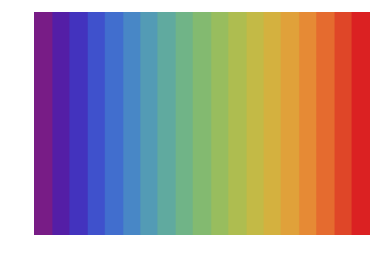

In [3]:
# colors = cm.viridis # Pick a color ramp
# discreteColors = [
# (166,206,227),
# (31,120,180),
# (178,223,138),
# (51,160,44),
# (251,154,153),
# (227,26,28),
# (253,191,111),
# (255,127,0),
# (202,178,214),
# (106,61,154)]

discreteColors=["#781C86", "#541EA6", "#4333BE", "#3F51CC", "#416ECE", "#4887C6", 
"#539BB5", "#60AA9F", "#70B487", "#83BA70", "#98BD5E", "#AEBD50",
"#C3BA46", "#D4B13F", "#E0A13A", "#E68A35", "#E56B2F", "#DF4628", 
"#DB2122"]


# discreteColors = ["#426FCE", "#4B8DC2", "#59A3AA", "#6BB18D", "#82BA71", "#9CBE5B", "#B7BD4B", "#CFB541", "#DFA43B", "#E68735", "#E35E2D", "#DD3124"]


# Create the colormap
colors = LinearSegmentedColormap.from_list('colors', discreteColors, N=ncolors) # Discretizes the interpolation into bins
# Fewer bins will result in "coarser" colomap interpolation

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


fig, ax = plt.subplots()

ax.imshow(gradient, aspect='auto', cmap=colors)

# Turn off *all* ticks & spines, not just the ones with colormaps.
ax.set_axis_off()

plt.show()

In [4]:
# { 'host': (redFloat, greenFloat, blueFloat, alphaFloat)} ## alpha is transparency
hostColors = { host: float(index)/ncolors for host,index in hostOrder.items() } # Convert host order to be scaled between 0 and 1
hostColors = { host: colors(index) for host, index in hostColors.items() } # Pull the RGB tuple by scaled index from the color ramp.
# print hostColors

In [5]:
import pickle

pickle.dump(hostColors, open("colors.p", "wb")) # Save the dictionary itself

(0.25393500000000002, 0.26525399999999999, 0.52998299999999998, 1.0)
(0.10157400000000001, 0.1061016, 0.21199319999999999)
(0.25393500000000002, 0.26525399999999999, 0.52998299999999998, 0.7)


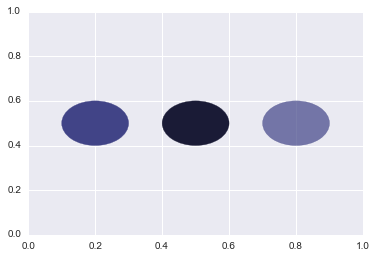

In [8]:
## Examples

c = colors(0.2) # Pull the color at this index of the color map
print c

saturation = 0.4 # Note that saturation is different than alpha (opacity)
c_desat = tuple([i*saturation for i in c[:3]] )
print c_desat

transparency = 0.7
c_transparent = list(c)
c_transparent[-1] = transparency # Make the RGBA tuple mutable, change the last value (alpha)
c_transparent = tuple(c_transparent) # Must be tuple for plotting
print c_transparent

circle1 = plt.Circle((0.2, 0.5), 0.1, color=c)
circle2 = plt.Circle((0.5,0.5), 0.1, color=c_desat)
circle3 = plt.Circle((0.8,0.5), 0.1, color=c_transparent)
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)

plt.show()